In [1]:
import pandas as pd
# results = pd.read_excel('results.xlsx') for old results
results = pd.read_csv('results.csv')
true_results = pd.read_csv('true_results.csv')

In [2]:
pd.set_option("display.max_columns", None)
#true_results.head(10)
#true_results.head(10)

## Graphs for comparing model and manual annotations

In [3]:
# picking columns to graph
cols = ['Group', 'DET', 'ADJ:FORM', 'CONJ', 'MORPH', 'NOUN:POSS', 'NOUN:NUM', 'PREP', 'PRON', 'VERB:FORM', 'VERB:INFL', 'VERB:SVA', 'VERB:TENSE', 'WO']
names = ['Determiners', 'Adjective Form', 'Conjunctions', 'Morphology', 'Noun Possessives', 'Noun Numbers (Plurals)', 'Prepositions', 'Pronouns',
         'Verb Forms','Verb Inflections','Subject Verb Agreement', 'Verb Tense', 'Word Order']

#average by arrival group
model_compare = results[cols].groupby('Group').mean()
model_compare = model_compare.reindex(['Monolingual', 'Early', 'Late'])
true_compare = true_results[cols].groupby('Group').mean()
true_compare = true_compare.reindex(['Monolingual', 'Early', 'Late'])

# uncomment to display names in the tables
new_column_names = {old_name: new_name for old_name, new_name in zip(model_compare.columns, names)}
model_compare = model_compare.rename(columns=new_column_names)
new_column_names = {old_name: new_name for old_name, new_name in zip(true_compare.columns, names)}
true_compare = true_compare.rename(columns=new_column_names)
# save to excel to display
combined = pd.concat([model_compare, true_compare]).T
combined.to_excel("display.xlsx")


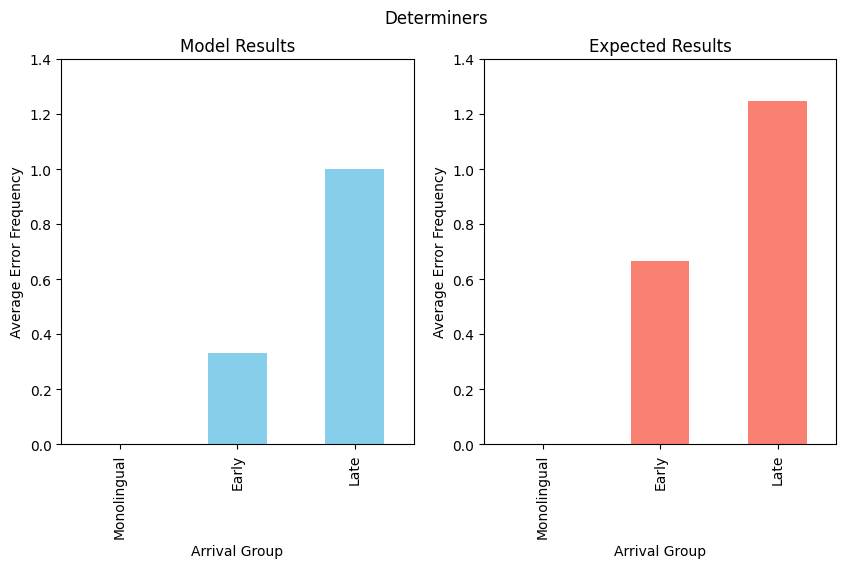

<Figure size 640x480 with 0 Axes>

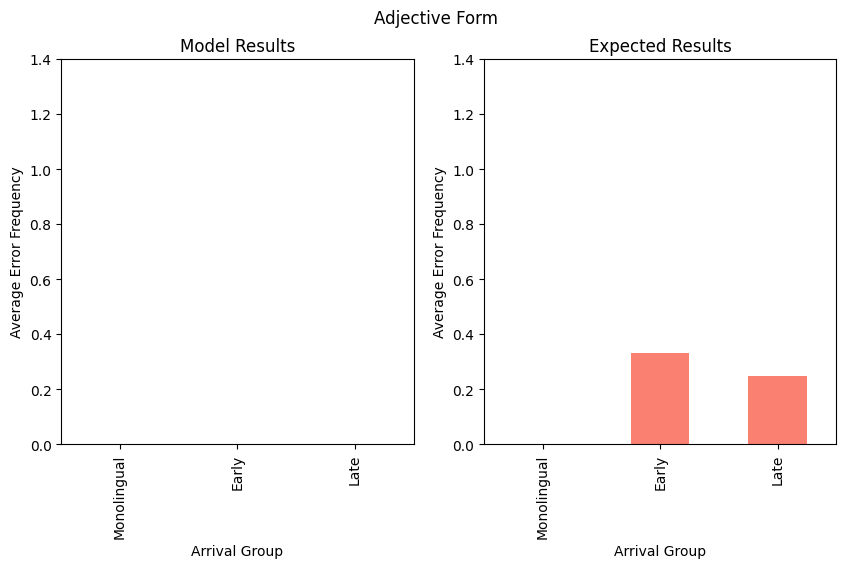

<Figure size 640x480 with 0 Axes>

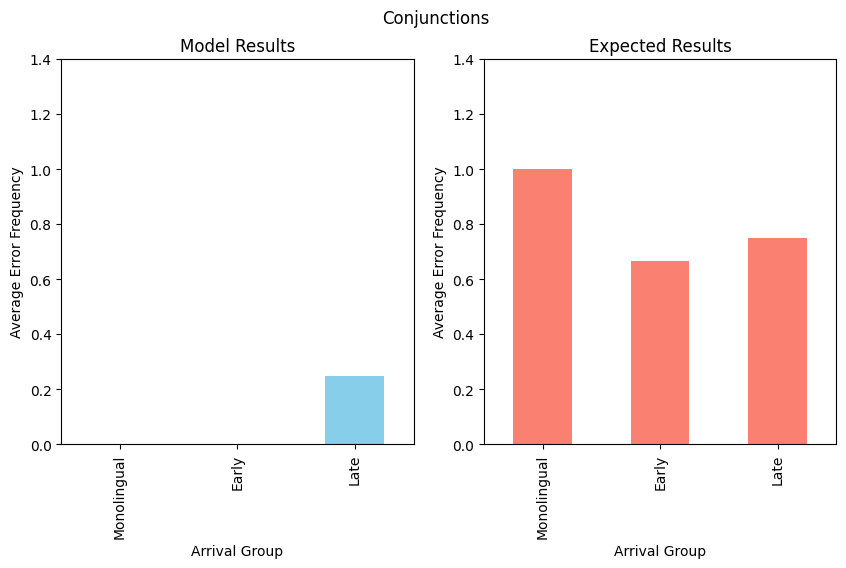

<Figure size 640x480 with 0 Axes>

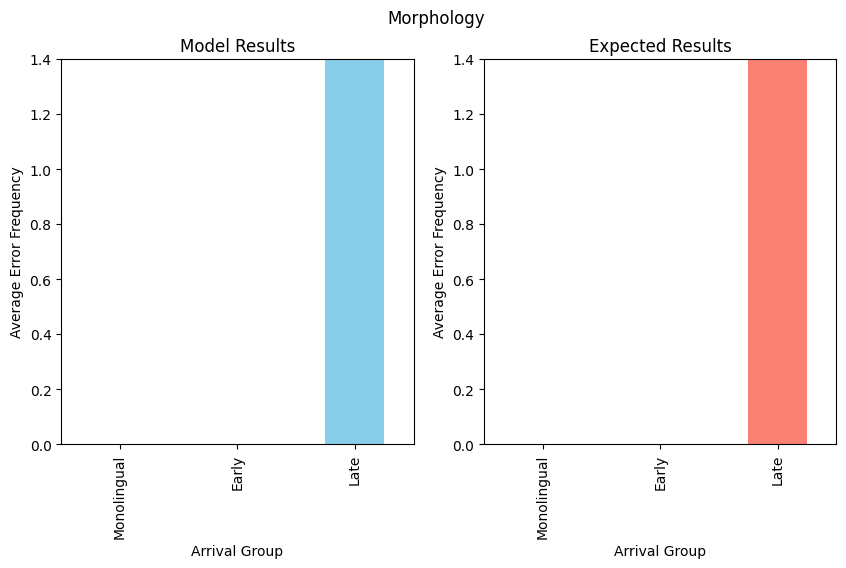

<Figure size 640x480 with 0 Axes>

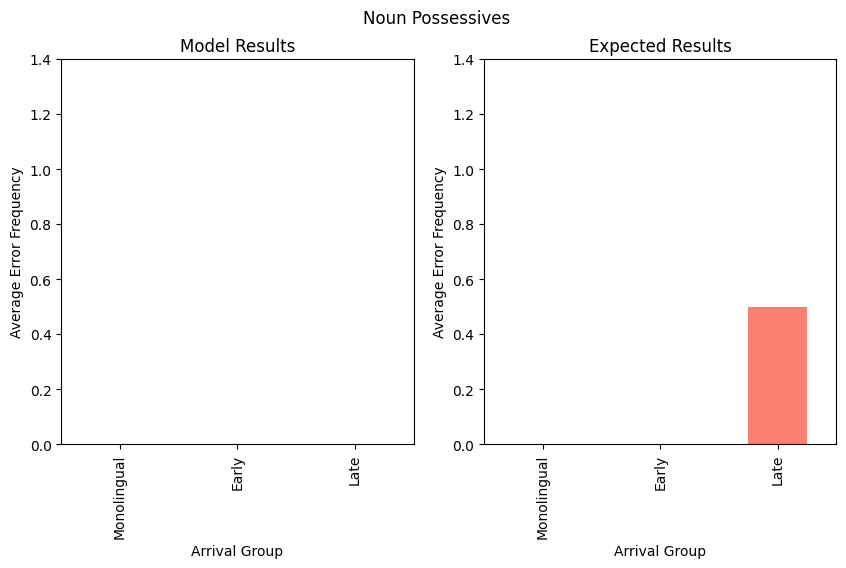

<Figure size 640x480 with 0 Axes>

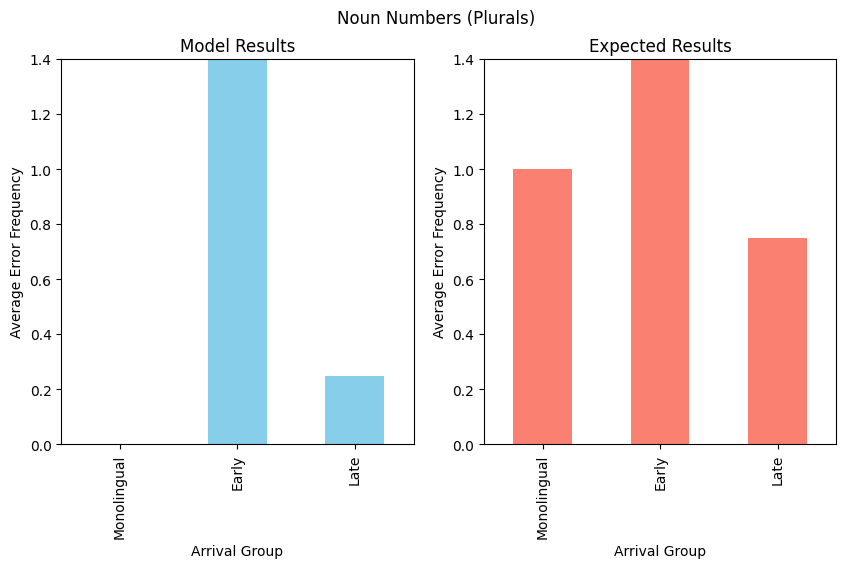

<Figure size 640x480 with 0 Axes>

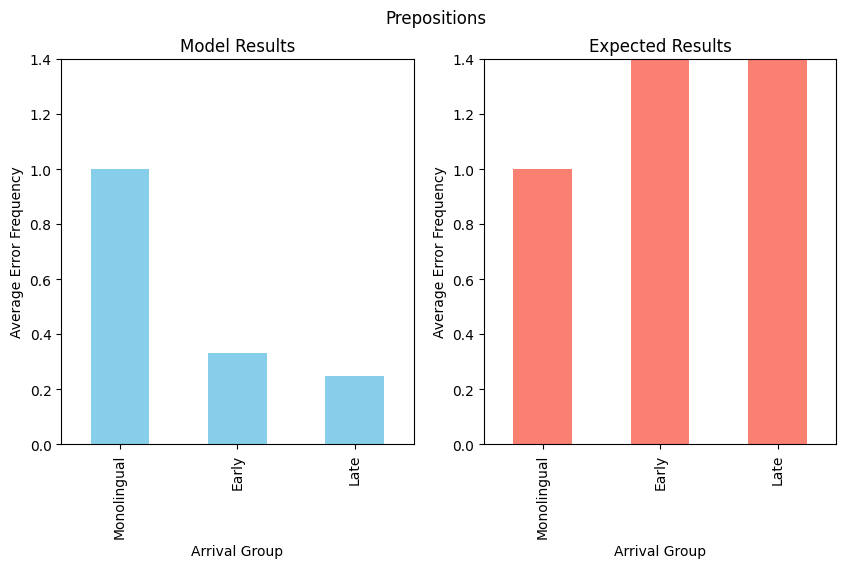

<Figure size 640x480 with 0 Axes>

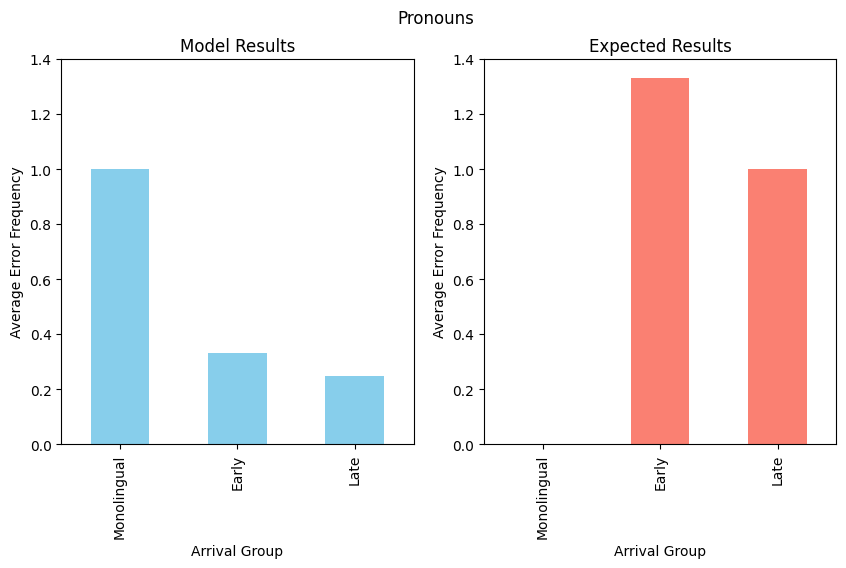

<Figure size 640x480 with 0 Axes>

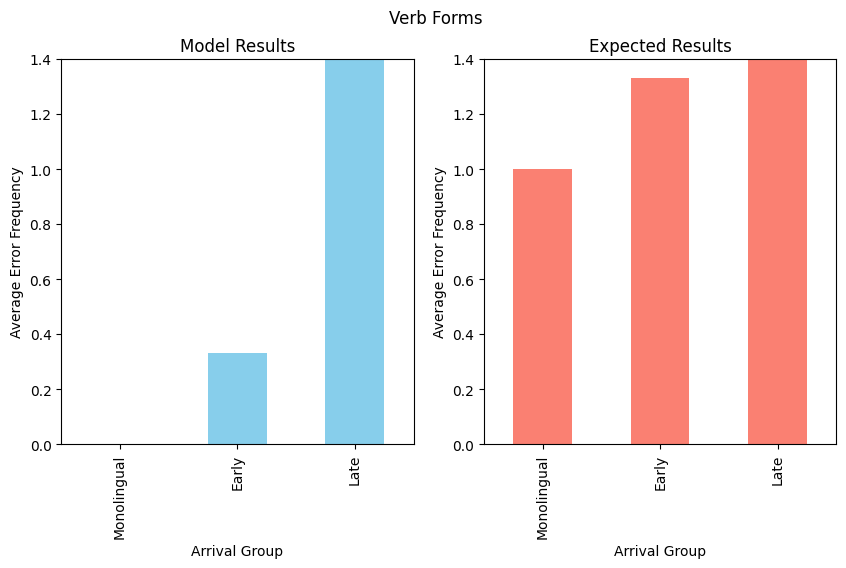

<Figure size 640x480 with 0 Axes>

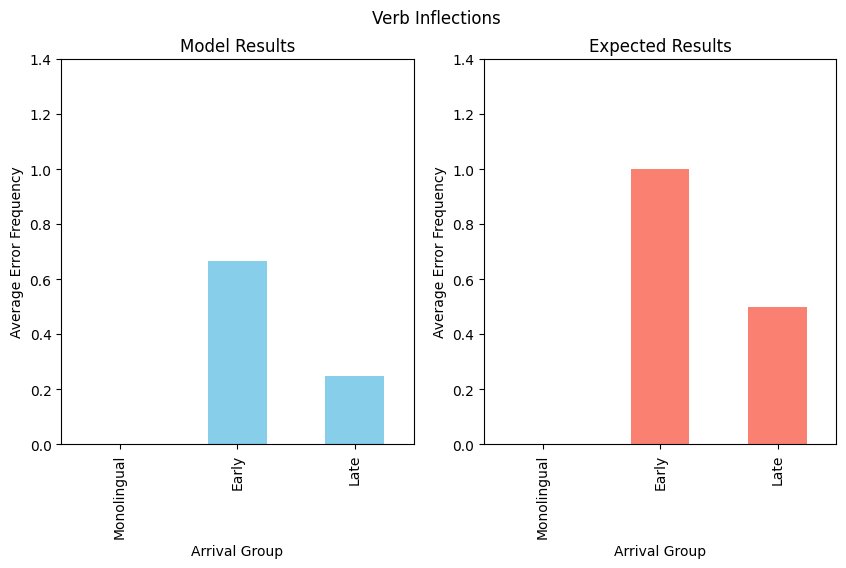

<Figure size 640x480 with 0 Axes>

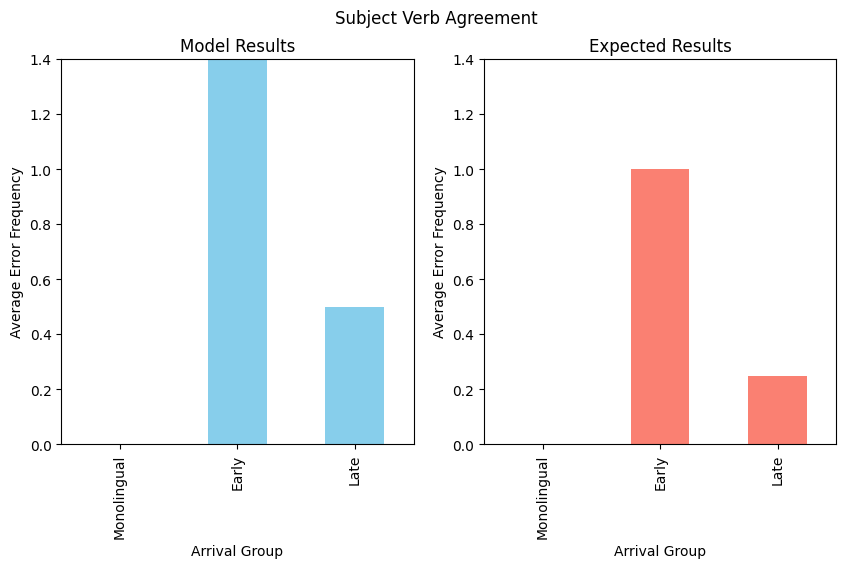

<Figure size 640x480 with 0 Axes>

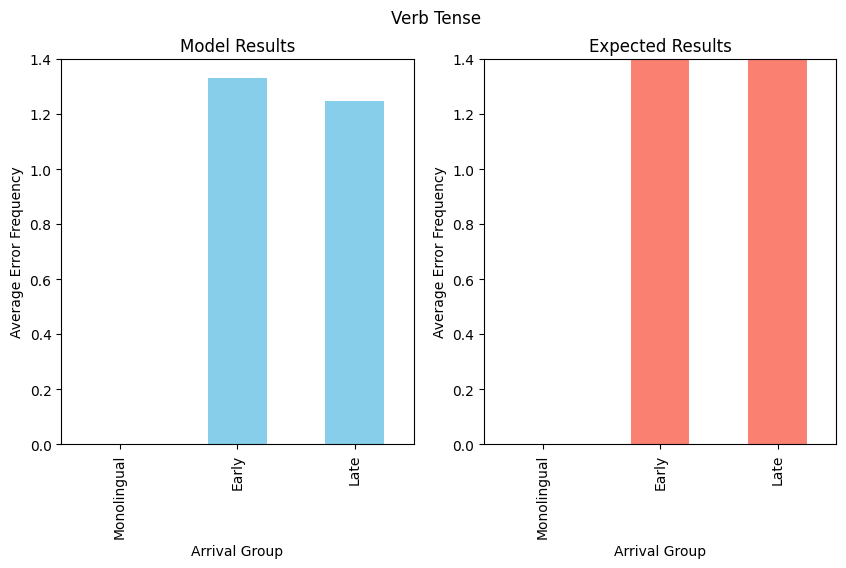

<Figure size 640x480 with 0 Axes>

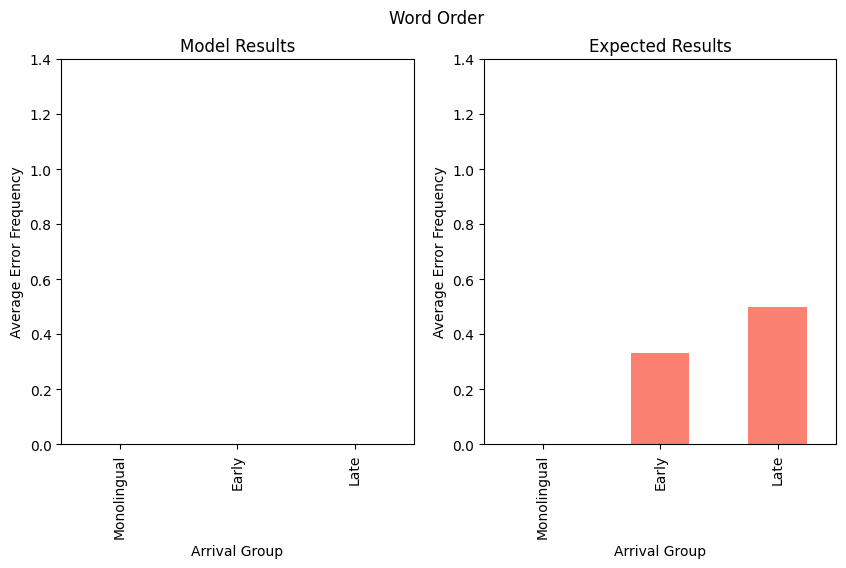

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
idx = 0
for column in model_compare.columns:
    if column != 'Group':
        max_value=1.4 # ADJUST THIS
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        plt.figure()

        #plot model annotations
        model_compare[column].plot(kind='bar', ax=axes[0], color='skyblue')
        axes[0].set_title('Model Results')
        axes[0].set_ylabel('Average Error Frequency')
        axes[0].set_xlabel('Arrival Group')
        axes[0].set_ylim(0, max_value)

        #plot manual annotations
        true_compare[column].plot(kind='bar', ax=axes[1], color='salmon')
        axes[1].set_title('Expected Results')
        axes[1].set_ylabel('Average Error Frequency')
        axes[1].set_xlabel('Arrival Group')
        axes[1].set_ylim(0, max_value)

        fig.suptitle(names[idx])
        #fig.suptitle("Average [type] errors")
        plt.tight_layout()
        plt.show()
        idx+=1

## Graphs for comparing model against language transfer hypothesis

In [5]:
cols = ['Code', 'Group', 'DET', 'MORPH', 'VERB:FORM', 'VERB:INFL']
good = results[cols]
#good.head(9)

In [6]:
avg = good.groupby('Group').mean()
avg = avg.reindex(['Monolingual', 'Early', 'Late'])
#avg

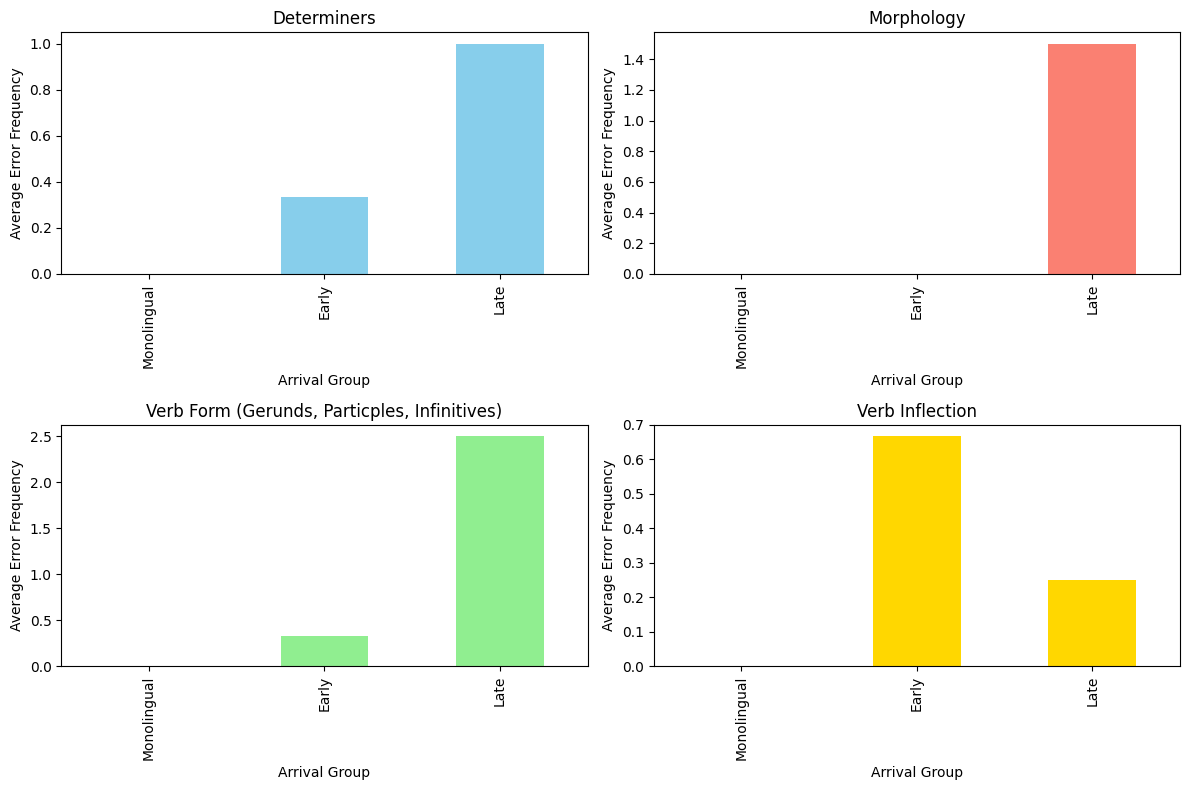

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# !!! REPLACE with right error type to plot

avg['DET'].plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Determiners')
axs[0, 0].set_ylabel('Average Error Frequency')
axs[0, 0].set_xlabel('Arrival Group')

avg['MORPH'].plot(kind='bar', ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Morphology')
axs[0, 1].set_ylabel('Average Error Frequency')
axs[0, 1].set_xlabel('Arrival Group')

avg['VERB:FORM'].plot(kind='bar', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Verb Form (Gerunds, Particples, Infinitives)')
axs[1, 0].set_ylabel('Average Error Frequency')
axs[1, 0].set_xlabel('Arrival Group')

avg['VERB:INFL'].plot(kind='bar', ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Verb Inflection')
axs[1, 1].set_ylabel('Average Error Frequency')
axs[1, 1].set_xlabel('Arrival Group')

plt.tight_layout()
plt.show()